# Data Preparation

In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Load and preview the dataset

data = pd.read_csv('./data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Exploring null values, object types, and dropping irrelevant variables

In [4]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
data['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [6]:
# View a sample of homes with null value for 'view'

data[data['view'].isna()].sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13863,6669240230,3/17/2015,306000.0,3,2.50,2588,5702,2.0,NaN,NaN,...,8 Good,2588,0.0,2008,NaN,98042,47.3453,-122.151,2403,5703
10174,806800400,2/9/2015,275000.0,3,2.50,2710,5733,2.0,NO,NaN,...,7 Average,2710,0.0,2003,0.0,98092,47.3357,-122.171,2720,5733
11634,1796200140,3/9/2015,270000.0,3,1.75,2840,9800,1.0,NO,NaN,...,7 Average,1420,1420.0,1977,0.0,98042,47.3516,-122.119,1650,9590
19989,148000475,5/28/2014,1400000.0,4,3.25,4700,9160,1.0,NO,NaN,...,11 Excellent,2520,2180.0,2005,0.0,98116,47.5744,-122.406,2240,8700
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023


In [7]:
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [8]:
# View a sample of homes with null value for 'waterfront'

data[data['waterfront'].isna()].sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20340,9828702771,11/13/2014,359950.0,2,1.50,893,965,2.0,NaN,NONE,...,8 Good,893,0.0,2007,0.0,98122,47.6187,-122.301,1340,1436
18665,9169600209,8/20/2014,746300.0,3,1.75,2060,5721,1.0,NaN,AVERAGE,...,9 Better,1140,920.0,1964,0.0,98136,47.5268,-122.388,2060,8124
21286,7853360480,9/4/2014,540000.0,4,2.50,2710,9248,2.0,NaN,NONE,...,7 Average,2710,0.0,2011,NaN,98065,47.5164,-121.875,2710,5000
7070,2724079090,1/5/2015,1650000.0,4,3.25,3920,881654,3.0,NaN,GOOD,...,11 Excellent,3920,?,2002,NaN,98024,47.5385,-121.896,2970,112384
16140,1454100440,6/5/2014,456000.0,4,1.75,1670,9886,1.0,NaN,NONE,...,7 Average,1670,0.0,1947,0.0,98125,47.7249,-122.287,2590,9997


### Addressing null values in `waterfront` and  `view`:
Using Google Maps, looked at a small sample of homes that have null values in `waterfront` or `view`. It's apparent that these homes are not on a waterfront or do not have a noteable view, respectively. This suggests that the null values can be filled in accordingly.

In [9]:
data['waterfront'].fillna('NO', inplace=True)
data['view'].fillna('NONE', inplace=True)

### Addresing null values in `yr_renovated`:


In [10]:
(data['yr_renovated'].isna()).sum()

3842

In [11]:
(data['yr_renovated'] == 0).sum()

17011

This column has 3,842 null values. Additionally, 17,011 records have a `yr_renovated` of 0, which is asssumed to mean the home wasn't renovated. Together, these amount to over 96% of the data.

Rather than impute these values with some number, we can make a new column that tells us whether the home was reonavated in the 10 years prior to its sale.

In [12]:
yr_renovated = data['yr_renovated']
data.drop('yr_renovated', inplace=True, axis=1)

In [13]:
yr_sold = data['date'].str[-4:].astype(int)
data['renovated_last_10'] = (yr_renovated >= (yr_sold - 10))
data['renovated_last_10'] = data['renovated_last_10'].map({True: 'Yes', False: 'No'})
# Keeping this as a string for now in order to group it with categorical variables later.
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_10
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,No
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No


In [14]:
# Making sure there are no more null values
# and checking again on the data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   date               21597 non-null  object 
 2   price              21597 non-null  float64
 3   bedrooms           21597 non-null  int64  
 4   bathrooms          21597 non-null  float64
 5   sqft_living        21597 non-null  int64  
 6   sqft_lot           21597 non-null  int64  
 7   floors             21597 non-null  float64
 8   waterfront         21597 non-null  object 
 9   view               21597 non-null  object 
 10  condition          21597 non-null  object 
 11  grade              21597 non-null  object 
 12  sqft_above         21597 non-null  int64  
 13  sqft_basement      21597 non-null  object 
 14  yr_built           21597 non-null  int64  
 15  zipcode            21597 non-null  int64  
 16  lat                215

### Why is `sqft_basement` an object type?

In [15]:
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [16]:
data['sqft_basement'].value_counts(normalize=True, ascending=False)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
1920.0    0.000046
3480.0    0.000046
2730.0    0.000046
2720.0    0.000046
248.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

The values in `sqft_basement` are strings. I have to deal with values of '0.0' and '?' It is unclear whether these values mean
* there is no basement
* there is a basement but it's unfinished
* something else

Rather than make any unsafe assumptions, I will drop this column, as well as `sqft_above`.

In [17]:
data.drop(['sqft_basement', 'sqft_above'], axis=1, inplace=True)

In [18]:
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_10
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,1951,98125,47.7210,-122.319,1690,7639,No
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,1933,98028,47.7379,-122.233,2720,8062,No


### Converting `yr_built` to `age`

In [19]:
yr_built = data['yr_built']
data['age'] = yr_sold - yr_built
data.drop('yr_built', axis=1, inplace=True)

### Bulk dropping columns:

The following variables either can't be changed by someone selling their home or don't provide much useful information. As for `date`, all homes in this dataset were sold between May 2014 and May 2015.

* `id`
* `date`
* `zipcode`
* `lat`
* `long`
* `sqft_living15`
* `sqft_lot15`

In [20]:
data.drop(
    ['id', 
    'date',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'],
    
    axis=1,
    inplace=True
)

### Dealing with categorical variables

In [21]:
data.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovated_last_10,age
333,640000.0,2,1.00,1070,5000,1.0,NO,NONE,Average,7 Average,No,91
11280,650000.0,3,2.00,2300,5000,1.0,NO,NONE,Good,8 Good,No,76
8032,455000.0,2,1.50,1200,1259,2.0,NO,NONE,Average,8 Good,No,-1
4924,653000.0,3,3.00,3040,5067,3.0,NO,AVERAGE,Average,10 Very Good,No,21
14735,381000.0,2,2.00,1340,4447,1.0,NO,NONE,Average,8 Good,No,10
2022,475000.0,3,1.00,1250,150117,1.0,NO,NONE,Average,7 Average,No,40
18642,237950.0,3,1.75,1310,7314,1.0,NO,NONE,Very Good,6 Low Average,No,55
18618,600000.0,3,2.50,2630,77972,2.0,NO,NONE,Average,9 Better,No,10
14297,570000.0,3,1.00,1890,3330,1.5,NO,NONE,Good,7 Average,No,113
11547,808250.0,3,2.00,1750,2640,1.0,NO,NONE,Average,8 Good,Yes,100


I plan to treat the following as categorical variables:
* `bedrooms`
* `bathrooms`
* `floors`
* `waterfront`
* `view`
* `condition`
* `grade`
* `renovated_last_10`

I'll have to clean up some of the values for consistency.

With some [research online](https://www.badeloftusa.com/buying-guides/75-bathroom/), I found out that a .75 bathroom means it has a sink, toilet, and shower, but not a full tub. That explains why some houses have bathroom counts ending in .75 and .25. 

**Removing noise**: If a category appears in the dataset fewer than 40 times, I am dropping that category from the dataset.

In [22]:
cat = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'renovated_last_10']

for c in cat:
    # get value counts
    counts = data[c].value_counts()
    # Isolate offending categories for each variable
    bad_cats = counts[counts < 40].index
    # Isolate indices in the dataset where offending categories are found
    to_drop = data[data[c].isin(bad_cats)].index
    # Drop
    data.drop(to_drop, inplace=True)

### View

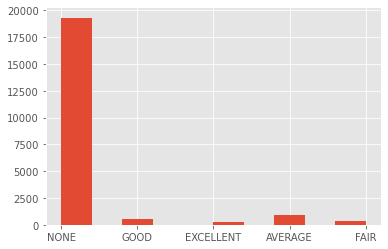

In [23]:
# Histogram of the values in 'view'
plt.hist(data['view']);

**`view` can be made into a binary variable where 1 means there is a view and 0 means there is not.**

**While we're at, we'll do this for `renovated_last_10` and `waterfront`.**

In [24]:
# Binarizing view
view_dict = {
    'FAIR': 1,
    'AVERAGE': 1,
    'GOOD': 1,
    'EXCELLENT': 1,
    'NONE': 0
}

data['view'] = data['view'].map(view_dict)

# Binarizing waterfront
waterfront_dict = {
    'YES': 1,
    'NO': 0
}

data['waterfront'] = data['waterfront'].map(waterfront_dict)

# Binarizing renovated_last_10
renovated_dict = {
    'Yes': 1,
    'No': 0
}

data['renovated_last_10'] = data['renovated_last_10'].map(renovated_dict)

**I want to standardize (stylistically) what `grade` and `condition` look like.** 

In [25]:
data['grade'].value_counts()

7 Average        8934
8 Good           6035
9 Better         2605
6 Low Average    2023
10 Very Good     1118
11 Excellent      363
5 Fair            232
12 Luxury          68
Name: grade, dtype: int64

In [26]:
data['condition'].value_counts()

Average      13886
Good          5636
Very Good     1690
Fair           166
Name: condition, dtype: int64

In [27]:
# Replace spaces in grade with undescores

data['grade'] = data['grade'].str.replace(' ', '_')

In [28]:
# Give condition the same syntax as grade

condition_dict = {
    'Poor': '1_Poor',
    'Fair': '2_Fair',
    'Average': '3_Average',
    'Good': '4_Good',
    'Very Good': '5_Very_Good'
}

data['condition'] = data['condition'].map(condition_dict)

### Getting dummies
In order for the model to process the categorical variables, they need to made into dummy variables.


In [29]:
# Saving a copy of the dataset in its current state just in case
data_before_dummies = data.copy()
# data_before_dummies.to_csv('./data/data_before_dummies.csv')

In [30]:
# Floors, Bathrooms, and Bedrooms
# Turning these into strings so that Pandas can turn them into dummies.

data[['floors', 'bedrooms', 'bathrooms']] = data[['floors', 'bedrooms', 'bathrooms']].astype(str)

In [31]:
# The three types of variables my cleaned up dataset will have

data_binary = data[['waterfront', 'view', 'renovated_last_10']]
data_num = data[['price', 'sqft_living', 'sqft_lot', 'age']]
data_cat = data[['floors', 'bedrooms', 'bathrooms', 'condition', 'grade']]

In [32]:
# Creating dummies
# I am NOT dropping the first dummy arbitrarily.
# Instead, I will choose which specific dummy I want to drop 
# in order to make the model coefficients more interpretable.

data_cat_dummies = pd.get_dummies(data_cat, dtype=int)

# These are the lowest order from each set of categories (that haven't already dropped)
# Dummy variable coefficients will be interpreted in reference to these.

dummies_to_drop = [
    'floors_1.0', 
    'bedrooms_1', 
    'bathrooms_0.75', 
    'condition_2_Fair', 
    'grade_5_Fair'
    ]

data_cat_dummies.drop(
    dummies_to_drop,
     axis = 1,
     inplace=True)

In [33]:
# Merge all the variables back together

data = pd.concat([data_num, data_binary, data_cat_dummies], axis=1)

data.head() # preview


,price,sqft_living,sqft_lot,age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_3_Average,condition_4_Good,condition_5_Very_Good,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,221900.0,1180,5650,59,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,538000.0,2570,7242,63,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,180000.0,770,10000,82,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,604000.0,1960,5000,49,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,510000.0,1680,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [34]:
data.columns

Index(['price', 'sqft_living', 'sqft_lot', 'age', 'waterfront', 'view',
       'renovated_last_10', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5',
       'condition_3_Average', 'condition_4_Good', 'condition_5_Very_Good',
       'grade_10_Very_Good', 'grade_11_Excellent', 'grade_12_Luxury',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better'],
      dtype='object')

Columns for `grade` are out of order. I will reposition them for readability.

In [35]:
df_columns = data.columns.to_list()
df_columns

['price',
 'sqft_living',
 'sqft_lot',
 'age',
 'waterfront',
 'view',
 'renovated_last_10',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_1.0',
 'bathrooms_1.5',
 'bathrooms_1.75',
 'bathrooms_2.0',
 'bathrooms_2.25',
 'bathrooms_2.5',
 'bathrooms_2.75',
 'bathrooms_3.0',
 'bathrooms_3.25',
 'bathrooms_3.5',
 'bathrooms_3.75',
 'bathrooms_4.0',
 'bathrooms_4.25',
 'bathrooms_4.5',
 'condition_3_Average',
 'condition_4_Good',
 'condition_5_Very_Good',
 'grade_10_Very_Good',
 'grade_11_Excellent',
 'grade_12_Luxury',
 'grade_6_Low_Average',
 'grade_7_Average',
 'grade_8_Good',
 'grade_9_Better']

In [36]:
df_columns_reordered = [
'price',
'sqft_living',
'sqft_lot',
'age',
'waterfront',
'view',
'renovated_last_10',
'floors_1.5',
'floors_2.0',
'floors_2.5',
'floors_3.0',
'bedrooms_2',
'bedrooms_3',
'bedrooms_4',
'bedrooms_5',
'bedrooms_6',
'bathrooms_1.0',
'bathrooms_1.5',
'bathrooms_1.75',
'bathrooms_2.0',
'bathrooms_2.25',
'bathrooms_2.5',
'bathrooms_2.75',
'bathrooms_3.0',
'bathrooms_3.25',
'bathrooms_3.5',
'bathrooms_3.75',
'bathrooms_4.0',
'bathrooms_4.25',
'bathrooms_4.5',
'condition_3_Average',
'condition_4_Good',
'condition_5_Very_Good',
'grade_6_Low_Average',
'grade_7_Average',
'grade_8_Good',
'grade_9_Better',
'grade_10_Very_Good',
'grade_11_Excellent',
'grade_12_Luxury',
]

data = data[df_columns_reordered]

In [37]:
data.head()

,price,sqft_living,sqft_lot,age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_3_Average,condition_4_Good,condition_5_Very_Good,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury
0,221900.0,1180,5650,59,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,63,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,180000.0,770,10000,82,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,604000.0,1960,5000,49,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,510000.0,1680,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [38]:
data.columns

Index(['price', 'sqft_living', 'sqft_lot', 'age', 'waterfront', 'view',
       'renovated_last_10', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5',
       'condition_3_Average', 'condition_4_Good', 'condition_5_Very_Good',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better', 'grade_10_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury'],
      dtype='object')

In [39]:
# Save this version of the dataset
# data.to_csv('./data/data_post_prep.csv')